Run `pip install .` to install dependencies from `setup.cfg` file.

Also, run `pip install -r requirements.txt`

In [4]:
import ImgSim.image_similarity as imgsim

from matplotlib import pyplot as plt


### Initialise the Class

Having loaded in the library above, you can then initialise the class object. For this you will be required to pass in a string argument to specify the neural network architecture that you wish to load - e.g. resnet50

A second argument is available to specify the weights that you wish to load. At present the functionality only accomodates model weights that are supported as standard by Pytorch's torchvision library

In [5]:
ImgSim = imgsim.Img2Vec('resnet50', weights='DEFAULT')

In [6]:
# observe several of the class attributes post-initialisation
print(ImgSim.architecture)
print(ImgSim.weights)
print(ImgSim.transform)
print(ImgSim.device)
# print(ImgSim.model)

resnet50
DEFAULT
ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)
cuda:0


The final line of the above cell prints the neural network architecture used. However, for the purpose of embedding our images as vectors, we are interested in extracting the feature embeddings. 

In [7]:
print(ImgSim.embed)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


# CNN embeddings

### Create Embeddings Dataset

In [8]:
PATH_TO_DIR = f"no_background/images/"

ImgSim.embed_dataset(f"{PATH_TO_DIR}")
print(len(ImgSim.dataset))

for i in ImgSim.dataset.items():
    print(i)
    break

10
('/home/marco/datasets/pallet/zz_/coco_segmentation/v5_no_background/2b_jpg.rf.ba5eb280d3a842639244609f63e22f49.jpg', tensor([[[[0.0000]],

         [[0.0145]],

         [[0.0389]],

         ...,

         [[0.0220]],

         [[0.0000]],

         [[0.0264]]]], device='cuda:0', grad_fn=<MeanBackward1>))


### Return most similar images to a target image

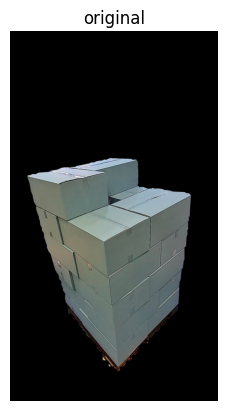

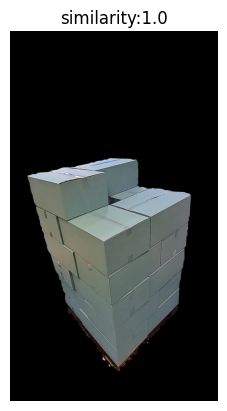

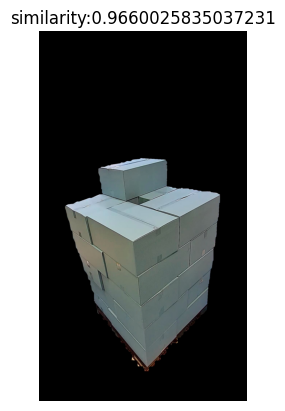

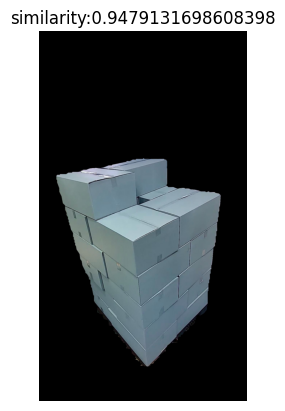

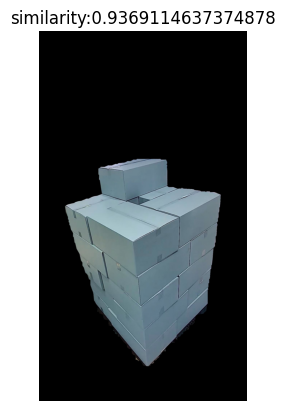

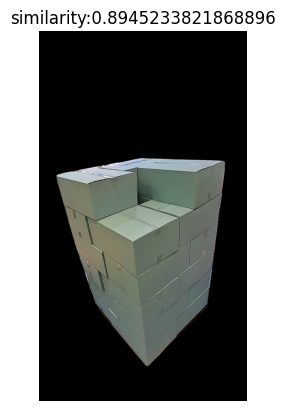

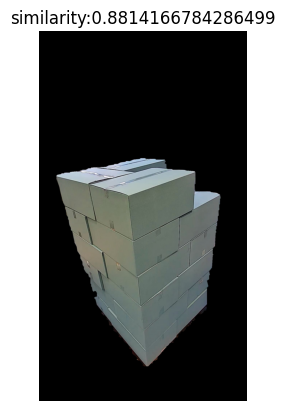

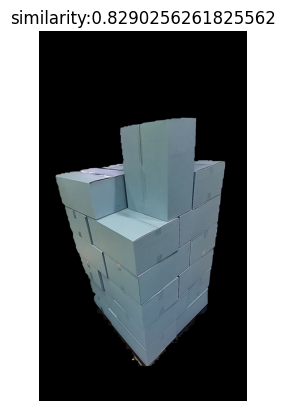

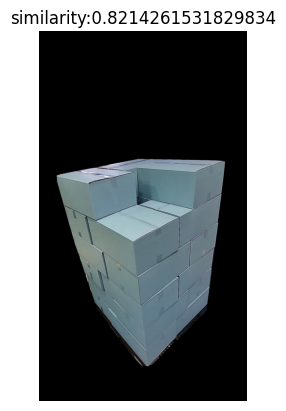

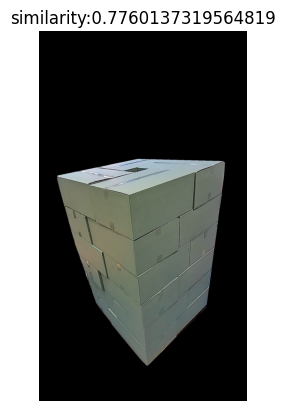

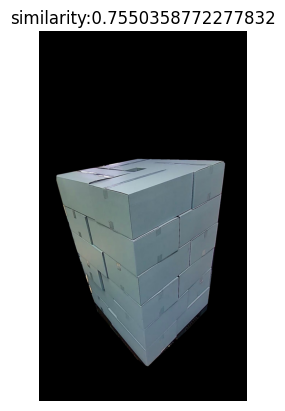

In [9]:
import os
IDX = 3

img = os.listdir(PATH_TO_DIR)[IDX]
target_image = f"{PATH_TO_DIR}/{img}"

similar_images_dict = ImgSim.similar_images(target_image, n=10)


In [40]:
similar_images_dict

{'/home/marco/datasets/pallet/coco_segmentation/v5_no_background/2b_jpg.rf.ba5eb280d3a842639244609f63e22f49.jpg': 1.0,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/3b_jpg.rf.25c4413675f88ae82aefdd0c622788e9.jpg': 0.9507623910903931,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/2a_jpg.rf.8619f9601929ecf49f9a861445a0d08f.jpg': 0.9479131698608398,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/3a_jpg.rf.0a772c3e080b26f5907f88adf7b476b5.jpg': 0.9310487508773804,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/1a_jpg.rf.153d9005b9d4eb8663266fb2be402246.jpg': 0.8687706589698792,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/1b_jpg.rf.a5adc1bb55f0cb60382e0d040e55a486.jpg': 0.8581417798995972,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/1x_jpg.rf.2492c61d03fde6c3bb22ff4a7bdefd8b.jpg': 0.8414368629455566,
 '/home/marco/datasets/pallet/coco_segmentation/v5_no_background/0x_jpg.rf.81

### Save results

In [41]:
save_dir = "....../Downloads/ImageSimilarity"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for image_path, similarity_score in similar_images_dict.items():
    # Load the images
    target_img = plt.imread(target_image)
    other_img = plt.imread(image_path)

    fig, ax = plt.subplots(1, 2, gridspec_kw={'wspace': 0})

    ax[0].imshow(target_img)
    ax[0].axis('off')
    ax[0].set_title('Target Image')

    ax[1].imshow(other_img)
    ax[1].axis('off')
    ax[1].set_title(f'Similarity: {similarity_score:.4f}')

    filename = os.path.basename(f'{target_image}_similarity_{similarity_score:.4f}')
    save_path = os.path.join(save_dir, f'{filename}.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()


[running kmeans]: 0it [00:53, ?it/s]
[running kmeans]: 0it [00:47, ?it/s]


### Save the embedded image dataset for future

In [42]:
save_dir_emb_data = "...../Downloads/ImageSimilarity"
ImgSim.save_dataset(save_dir_emb_data)

#### Load previously embedded dataset

In [43]:
ImgSim.load_dataset(f"{save_dir_emb_data}/tensors.pt")

#### Cluster embedded dataset

running k-means on cuda:0..


[running kmeans]: 2it [00:00, 637.24it/s, center_shift=0.000000, iteration=2, tol=0.000100]


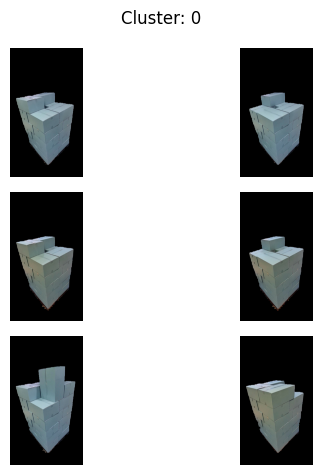

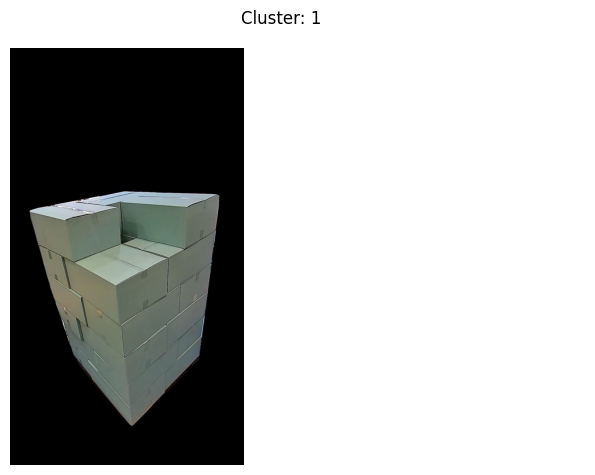

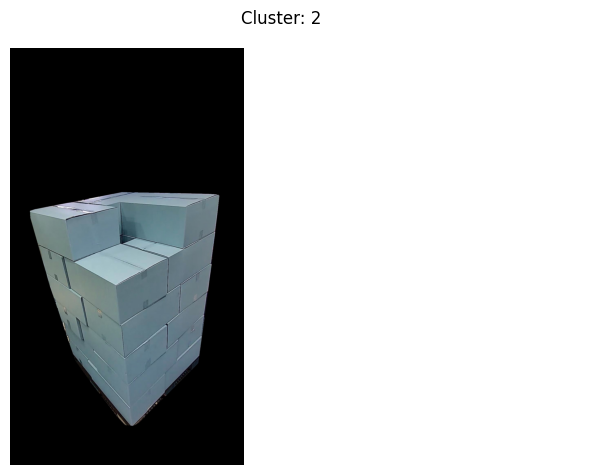

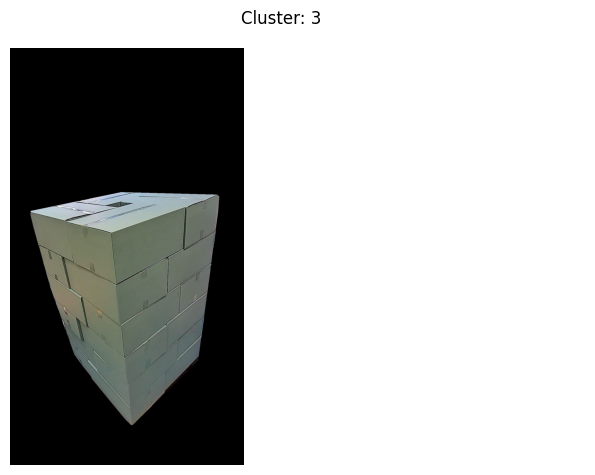

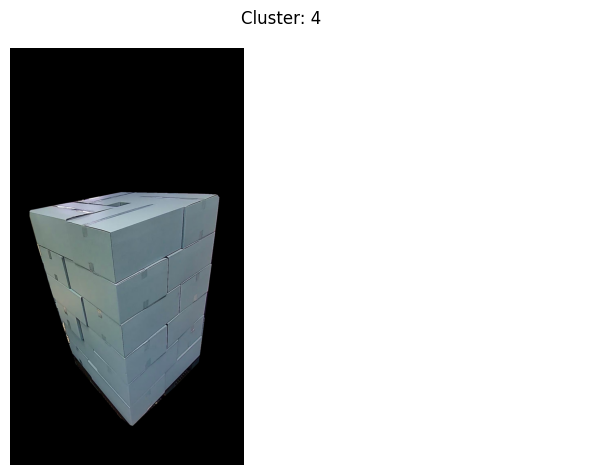

In [46]:
ImgSim.cluster_dataset(nclusters=5, display=True)